## memo
* validでのaccuracyを計算　実装する
* 特徴量の作り方。どんな特徴量があるか？調べる
* 時系列データでのCVのやり方
* lightgbm のbinaryのmetric　違い

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [118]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1
2022,2012-01-12,109.68,109.90,109.44,109.83,0
2023,2012-01-13,109.53,109.72,109.08,109.66,1
2024,2012-01-17,109.99,110.47,109.57,109.96,1


### 予測する対象のデータにflg = 1を建てる 

In [119]:
df_test['pred_flg'] = 0
df_test['pred_flg'][5::6] = 1 
df_test.head(30)

<ipython-input-119-edad14ac1d73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_flg'][5::6] = 1


,Date,Open,High,Low,Close,pred_flg
0,2012-01-19,110.79,110.82,109.96,110.39,0
1,2012-01-20,110.45,111.10,110.36,110.73,0
2,2012-01-23,110.95,111.10,109.65,110.36,0
3,2012-01-24,110.16,110.16,108.13,108.39,0
4,2012-01-25,106.25,107.11,105.97,106.89,0
5,2012-01-26,109.03,109.16,108.37,108.75,1
6,2012-02-02,108.02,108.45,108.02,108.30,0
7,2012-02-03,108.75,109.60,108.64,109.40,0
8,2012-02-06,110.10,110.13,109.62,109.73,0
9,2012-02-07,109.05,110.30,109.04,110.09,0


In [120]:
df_train.head(20)

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
5,2004-01-09,51.11,51.32,51.01,51.01,0
6,2004-01-12,50.80,50.90,50.55,50.87,0
7,2004-01-13,50.90,50.98,50.53,50.61,1
8,2004-01-14,50.43,50.65,50.40,50.64,1
9,2004-01-15,51.01,51.27,50.70,51.01,1


# ECA

<AxesSubplot:xlabel='Close', ylabel='Count'>

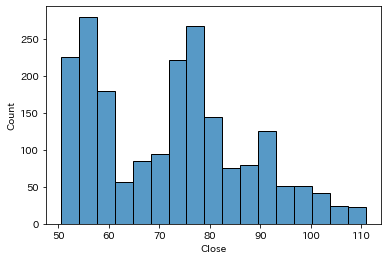

In [121]:
sns.histplot(df_train['Close'])

<AxesSubplot:xlabel='Close', ylabel='Count'>

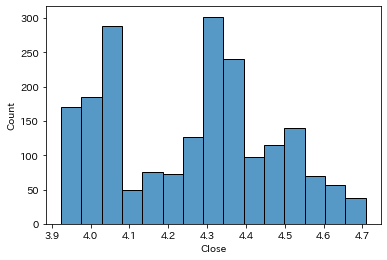

In [122]:
sns.histplot(np.log(df_train['Close']))

<AxesSubplot:xlabel='Close', ylabel='Count'>

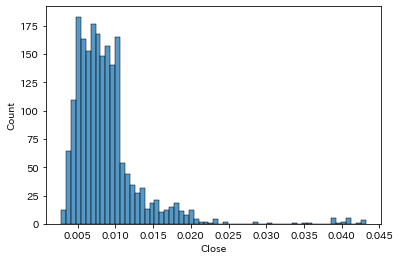

In [123]:
sns.histplot(np.log(df_train['Close']).diff().rolling(20).std())

In [194]:
feats = df_train.copy()

# 終値のみに絞る
feats= df_train[['Close']].copy()

# 終わり値の1営業日リターン
feats['return_1days'] = feats['Close'].pct_change(1)
# 終わり値の1営業日リターン
feats['return_2days'] = feats['Close'].pct_change(2)
# 終わり値の1営業日リターン
feats['return_3days'] = feats['Close'].pct_change(3)
# 終わり値の1営業日リターン
feats['return_4days'] = feats['Close'].pct_change(4)
# 終わり値の1営業日リターン
feats['return_5days'] = feats['Close'].pct_change(5)
# 終わり値の6営業日リターン
feats['return_6days'] = feats['Close'].pct_change(6)

# 終値の1営業日ボラティリティ
feats['volatility_1days'] = np.log(feats['Close']).diff().rolling(1).std()
# 終値の2営業日ボラティリティ
feats['volatility_2days'] = np.log(feats['Close']).diff().rolling(2).std()
# 終値の3営業日ボラティリティ
feats['volatility_3days'] = np.log(feats['Close']).diff().rolling(3).std()
# 終値の4営業日ボラティリティ
feats['volatility_4days'] = np.log(feats['Close']).diff().rolling(4).std()
# 終値の5営業日ボラティリティ
feats['volatility_5days'] = np.log(feats['Close']).diff().rolling(5).std()
# 終値の6営業日ボラティリティ
feats['volatility_6days'] = np.log(feats['Close']).diff().rolling(6).std()


# 終値の1営業日の単純移動平均線の剥離
feats['MA_gap_1days'] = feats['Close'] / (feats['Close'].rolling(1).mean())
# 終値の2営業日の単純移動平均線の剥離
feats['MA_gap_2days'] = feats['Close'] / (feats['Close'].rolling(2).mean())
# 終値の3営業日の単純移動平均線の剥離
feats['MA_gap_3days'] = feats['Close'] / (feats['Close'].rolling(3).mean())
# 終値の4営業日の単純移動平均線の剥離
feats['MA_gap_4days'] = feats['Close'] / (feats['Close'].rolling(4).mean())
# 終値の5営業日の単純移動平均線の剥離
feats['MA_gap_5days'] = feats['Close'] / (feats['Close'].rolling(5).mean())
# 終値の6営業日の単純移動平均線の剥離
feats['MA_gap_6days'] = feats['Close'] / (feats['Close'].rolling(6).mean())

# 欠損値処理
feats = feats.fillna(0)
# 元データのカラムを削除
feats = feats.drop(['Close'],axis = 1)

feats.head(8)

KeyError: 'Close'

In [125]:
df_train.iloc[1590:1620]

,Date,Open,High,Low,Close,Up
1590,2010-04-28,86.22,86.42,85.66,86.11,1
1591,2010-04-29,86.44,87.31,86.44,87.17,0
1592,2010-04-30,87.19,87.33,86.30,86.46,0
1593,2010-05-03,85.91,86.66,85.73,86.33,1
1594,2010-05-04,86.89,87.01,86.23,86.50,0
1595,2010-05-05,85.92,86.43,85.71,86.12,0
1596,2010-05-06,86.34,87.15,84.03,85.54,0
1597,2010-05-07,85.21,85.44,83.96,84.42,1
1598,2010-05-10,85.18,85.94,84.93,85.57,1
1599,2010-05-11,86.14,86.86,86.10,86.38,1


In [126]:
df_train

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1
2022,2012-01-12,109.68,109.90,109.44,109.83,0
2023,2012-01-13,109.53,109.72,109.08,109.66,1
2024,2012-01-17,109.99,110.47,109.57,109.96,1


In [127]:
df_test

,Date,Open,High,Low,Close,pred_flg
0,2012-01-19,110.79,110.82,109.96,110.39,0
1,2012-01-20,110.45,111.10,110.36,110.73,0
2,2012-01-23,110.95,111.10,109.65,110.36,0
3,2012-01-24,110.16,110.16,108.13,108.39,0
4,2012-01-25,106.25,107.11,105.97,106.89,0
...,...,...,...,...,...,...
1195,2019-12-17,185.52,186.40,184.62,184.68,0
1196,2019-12-18,183.86,184.01,182.38,183.10,0
1197,2019-12-19,183.83,185.17,183.66,185.08,0
1198,2019-12-20,186.29,186.64,184.81,185.19,0


In [129]:
feats = pd.concat([df_train[['Date','Up']],feats],axis = 1)
feats.head()

,Date,Up,return_1days,return_2days,return_3days,return_4days,return_5days,return_6days,volatility_1days,volatility_2days,volatility_3days,volatility_4days,volatility_5days,volatility_6days,MA_gap_1days,MA_gap_2days,MA_gap_3days,MA_gap_4days,MA_gap_5days,MA_gap_6days
0,2004-01-02,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0
1,2004-01-05,1,0.001380,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.000690,0.000000,0.000000,0.000000,0.0
2,2004-01-06,1,0.007088,0.008478,0.000000,0.000000,0.0,0.0,0.0,0.004019,0.000000,0.000000,0.0,0.0,1.0,1.003531,1.005175,0.000000,0.000000,0.0
3,2004-01-07,0,0.007038,0.014176,0.015576,0.000000,0.0,0.0,0.0,0.000035,0.003267,0.000000,0.0,0.0,1.0,1.003507,1.007038,1.009159,0.000000,0.0
4,2004-01-08,0,-0.004465,0.002542,0.009648,0.011041,0.0,0.0,0.0,0.008124,0.006647,0.005503,0.0,0.0,1.0,0.997762,0.999350,1.001905,1.003719,0.0


In [130]:
feats.set_index('Date',inplace = True)
feats

,Up,return_1days,return_2days,return_3days,return_4days,return_5days,return_6days,volatility_1days,volatility_2days,volatility_3days,volatility_4days,volatility_5days,volatility_6days,MA_gap_1days,MA_gap_2days,MA_gap_3days,MA_gap_4days,MA_gap_5days,MA_gap_6days
Date,,,,,,,,,,,,,,,,,,,
2004-01-02,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-05,1,0.001380,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000690,0.000000,0.000000,0.000000,0.000000
2004-01-06,1,0.007088,0.008478,0.000000,0.000000,0.000000,0.000000,0.0,0.004019,0.000000,0.000000,0.000000,0.000000,1.0,1.003531,1.005175,0.000000,0.000000,0.000000
2004-01-07,0,0.007038,0.014176,0.015576,0.000000,0.000000,0.000000,0.0,0.000035,0.003267,0.000000,0.000000,0.000000,1.0,1.003507,1.007038,1.009159,0.000000,0.000000
2004-01-08,0,-0.004465,0.002542,0.009648,0.011041,0.000000,0.000000,0.0,0.008124,0.006647,0.005503,0.000000,0.000000,1.0,0.997762,0.999350,1.001905,1.003719,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,1,-0.002383,-0.006298,-0.009102,-0.003661,0.015580,0.004244,0.0,0.001094,0.000797,0.004312,0.009711,0.010469,1.0,0.998807,0.997100,0.995542,0.995701,0.998960
2012-01-12,0,0.008911,0.006507,0.002556,-0.000273,0.005217,0.024629,0.0,0.007960,0.006989,0.005995,0.005754,0.009000,1.0,1.004436,1.005125,1.004481,1.003527,1.003808
2012-01-13,1,-0.001548,0.007349,0.004949,0.001004,-0.001820,0.003661,0.0,0.007368,0.006271,0.005831,0.005234,0.005254,1.0,0.999225,1.001919,1.002674,1.002340,1.001644


## Hold out 検証


In [162]:
train_end = '2010-05-28'
val_start = '2010-06-09'
val_end = '2012-01-12'
test_start = '2012-01-19'
test_end = '2019-12-23'

In [187]:
X_valid

,return_1days,return_2days,return_3days,return_4days,return_5days,return_6days,volatility_1days,volatility_2days,volatility_3days,volatility_4days,volatility_5days,volatility_6days,MA_gap_1days,MA_gap_2days,MA_gap_3days,MA_gap_4days,MA_gap_5days,MA_gap_6days
Date,,,,,,,,,,,,,,,,,,
2010-06-09,0.011448,0.027948,0.027455,0.016246,0.016005,0.034649,0.0,0.003393,0.008576,0.012207,0.010742,0.011396,1.0,1.005691,1.013002,1.016577,1.016511,1.016426
2010-06-10,-0.002450,0.008970,0.025429,0.024937,0.013755,0.013515,0.0,0.009784,0.009676,0.009055,0.010962,0.009879,1.0,0.998773,1.002149,1.007869,1.011237,1.011656
2010-06-11,0.001755,-0.000700,0.010740,0.027228,0.026735,0.015534,0.0,0.002974,0.007093,0.008565,0.008086,0.009813,1.0,1.000877,1.000350,1.002928,1.007695,1.010820
2010-06-14,0.003620,0.005381,0.002917,0.014399,0.030946,0.030452,0.0,0.001315,0.003108,0.005792,0.007546,0.007264,1.0,1.001807,1.002995,1.002976,1.005240,1.009435
2010-06-15,0.003839,0.007473,0.009241,0.006768,0.018293,0.034905,0.0,0.000155,0.001142,0.002913,0.005017,0.006813,1.0,1.001916,1.003762,1.005126,1.005454,1.007571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-06,0.005491,0.024909,0.013469,0.001824,-0.001364,0.004940,0.0,0.009653,0.015202,0.014771,0.012896,0.011841,1.0,1.002738,1.010021,1.010881,1.009056,1.007305
2012-01-09,-0.002822,0.002654,0.022017,0.010609,-0.001003,-0.004181,0.0,0.005871,0.011085,0.012936,0.012876,0.011581,1.0,0.998587,0.999939,1.005369,1.006412,1.005169
2012-01-10,-0.003925,-0.006736,-0.001281,0.018005,0.006642,-0.004924,0.0,0.000783,0.005143,0.010641,0.011582,0.011617,1.0,0.998034,0.996439,0.997008,1.001138,1.002051


In [167]:
# light gbm のパラメータ
params = {
    'boosting_type' : 'gbdt',
    'objective' : 'binary',
    'metric' : 'binary_logloss',
    'max_depth' : 9,
        }

X_train = feats.loc[:train_end,'return_1days':'MA_gap_6days']
y_train = feats['Up'][:train_end]
X_valid = feats.loc[val_start:val_end,'return_1days':'MA_gap_6days']
y_valid = feats['Up'][val_start:val_end]

train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_train, y_train,reference = train_data)

gbm = lgb.train(params,
                train_data,
                valid_sets = [train_data,valid_data],
                num_boost_round = 10000,
                early_stopping_rounds = 10,
                verbose_eval = 50
                )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 825, number of negative: 788
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511469 -> initscore=0.045885
[LightGBM] [Info] Start training from score 0.045885
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, 

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7fbed6534d30>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 24, in _log_callback
    def _log_callback(msg):
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [188]:
train_predict_prob = gbm.predict(X_train)
train_predict = np.where(train_predict_prob < 0.5, 0, 1)
train_predict_df = pd.concat([y_train.reset_index(),pd.Series(train_predict)],axis = 1)

valid_predict_prob = gbm.predict(X_valid)
valid_predict = np.where(valid_predict_prob < 0.5, 0, 1)
valid_predict_df = pd.concat([y_valid.reset_index(),pd.Series(valid_predict)], axis = 1)



,Date,Up,0
0,2010-06-09,0,1
1,2010-06-10,1,1
2,2010-06-11,1,0
3,2010-06-14,1,1
4,2010-06-15,1,1
...,...,...,...
399,2012-01-06,0,1
400,2012-01-09,0,1
401,2012-01-10,0,0
402,2012-01-11,1,0


In [195]:
feats_test = df_test.copy()

# 終値のみに絞る
feats_test= df_test[['Close']].copy()

# 終わり値の1営業日リターン
feats_test['return_1days'] = feats_test['Close'].pct_change(1)
# 終わり値の1営業日リターン
feats_test['return_2days'] = feats_test['Close'].pct_change(2)
# 終わり値の1営業日リターン
feats_test['return_3days'] = feats_test['Close'].pct_change(3)
# 終わり値の1営業日リターン
feats_test['return_4days'] = feats_test['Close'].pct_change(4)
# 終わり値の1営業日リターン
feats_test['return_5days'] = feats_test['Close'].pct_change(5)
# 終わり値の6営業日リターン
feats_test['return_6days'] = feats_test['Close'].pct_change(6)

# 終値の1営業日ボラティリティ
feats_test['volatility_1days'] = np.log(feats_test['Close']).diff().rolling(1).std()
# 終値の2営業日ボラティリティ
feats_test['volatility_2days'] = np.log(feats_test['Close']).diff().rolling(2).std()
# 終値の3営業日ボラティリティ
feats_test['volatility_3days'] = np.log(feats_test['Close']).diff().rolling(3).std()
# 終値の4営業日ボラティリティ
feats_test['volatility_4days'] = np.log(feats_test['Close']).diff().rolling(4).std()
# 終値の5営業日ボラティリティ
feats_test['volatility_5days'] = np.log(feats_test['Close']).diff().rolling(5).std()
# 終値の6営業日ボラティリティ
feats_test['volatility_6days'] = np.log(feats_test['Close']).diff().rolling(6).std()


# 終値の1営業日の単純移動平均線の剥離
feats_test['MA_gap_1days'] = feats_test['Close'] / (feats_test['Close'].rolling(1).mean())
# 終値の2営業日の単純移動平均線の剥離
feats_test['MA_gap_2days'] = feats_test['Close'] / (feats_test['Close'].rolling(2).mean())
# 終値の3営業日の単純移動平均線の剥離
feats_test['MA_gap_3days'] = feats_test['Close'] / (feats_test['Close'].rolling(3).mean())
# 終値の4営業日の単純移動平均線の剥離
feats_test['MA_gap_4days'] = feats_test['Close'] / (feats_test['Close'].rolling(4).mean())
# 終値の5営業日の単純移動平均線の剥離
feats_test['MA_gap_5days'] = feats_test['Close'] / (feats_test['Close'].rolling(5).mean())
# 終値の6営業日の単純移動平均線の剥離
feats_test['MA_gap_6days'] = feats_test['Close'] / (feats_test['Close'].rolling(6).mean())

# 欠損値処理
feats_test = feats_test.fillna(0)
# 元データのカラムを削除
feats_test = feats_test.drop(['Close'],axis = 1)

feats_test.head(8)

,return_1days,return_2days,return_3days,return_4days,return_5days,return_6days,volatility_1days,volatility_2days,volatility_3days,volatility_4days,volatility_5days,volatility_6days,MA_gap_1days,MA_gap_2days,MA_gap_3days,MA_gap_4days,MA_gap_5days,MA_gap_6days
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003080,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.001538,0.000000,0.000000,0.000000,0.000000
2,-0.003341,-0.000272,0.000000,0.000000,0.000000,0.000000,0.0,0.004541,0.000000,0.000000,0.000000,0.000000,1.0,0.998326,0.998793,0.000000,0.000000,0.000000
3,-0.017851,-0.021132,-0.018118,0.000000,0.000000,0.000000,0.0,0.010370,0.010809,0.000000,0.000000,0.000000,1.0,0.990994,0.986919,0.985655,0.000000,0.000000
4,-0.013839,-0.031443,-0.034679,-0.031706,0.000000,0.000000,0.0,0.002882,0.007570,0.009657,0.000000,0.000000,1.0,0.993032,0.984738,0.979811,0.977486,0.000000
5,0.017401,0.003321,-0.014589,-0.017881,-0.014856,0.000000,0.0,0.022053,0.019291,0.015770,0.014072,0.000000,1.0,1.008625,1.006851,1.001404,0.997487,0.995408
6,-0.004138,0.013191,-0.000830,-0.018666,-0.021945,-0.018933,0.0,0.015131,0.015950,0.015755,0.013658,0.012595,1.0,0.997927,1.002964,1.002012,0.997807,0.994460
7,0.010157,0.005977,0.023482,0.009318,-0.008699,-0.012011,0.0,0.010078,0.010894,0.014019,0.015168,0.013583,1.0,1.005053,1.005361,1.009831,1.009728,1.006610


In [191]:
# memo valの期間短くしないとリークするわ

In [196]:
test_predict_prob = gbm.predict(feats_test)
test_predict = np.where(test_predict_prob < 0.5 , 0 , 1)
test_predict

array([1, 1, 1, ..., 1, 0, 1])

In [206]:
test_pred_df = pd.concat([df_test[['Date','pred_flg']],pd.Series(test_predict)],axis = 1)
test_pred = test_pred_df.loc[test_pred_df['pred_flg']==1][['Date',0]]

In [207]:
test_pred.to_csv('submit.csv')